In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("alloy_oxidation_886_202406.csv")
df.describe()

,Al,Cr,Hf,Mo,Nb,Si,Ta,Ti,V,W,Zr,Temperature (C),time (h),specific mass gain (mg/cm2)
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,21.421490,10.809989,2.259955,6.219165,17.800305,2.521106,7.063747,25.300564,1.597009,0.845034,4.003883,984.785553,23.920993,25.369964
std,20.047317,16.666370,6.078858,9.149474,19.993248,7.264200,11.047199,17.255076,5.377660,3.614772,7.634385,152.101324,27.281882,49.868298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,600.000000,3.000000,0.020000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.390000,0.000000,0.000000,0.000000,900.000000,4.000000,1.242500
50%,18.000000,2.020000,0.000000,0.000000,17.390000,0.000000,0.000000,21.150000,0.000000,0.000000,0.000000,1000.000000,10.000000,5.590000
75%,43.000000,20.000000,0.000000,15.000000,23.497500,0.000000,16.670000,40.000000,0.000000,0.000000,0.000000,1100.000000,20.000000,23.937500
max,75.000000,90.500000,25.000000,33.330000,92.000000,37.000000,50.900000,86.750000,23.530000,28.200000,33.340000,1400.000000,100.000000,344.660000


In [3]:
temperature_bin = [x for x in range(600, 1500, 100)]
time_bin = [100, 50, 20, 10 ,4, 3]
temperature_bin_name = ["[600-700)", "[700-800)", "[800-900)", "[900-1000)", "[1000-1100)", "[1100-1200)", "[1200-1300)", "[1300-1400)", "[1400]"]

In [4]:
statistic_list = []

for T in temperature_bin:
    df_1 = df.loc[df['Temperature (C)'].between(T,T+100,'left')]
    temperature_list = []
    for time in time_bin: 
        df_2 = df_1.loc[df_1['time (h)'] == time]
        lens = len(df_2)
        temperature_list.append(lens)
    statistic_list.append(temperature_list)
statistic_list = np.transpose(statistic_list)
        

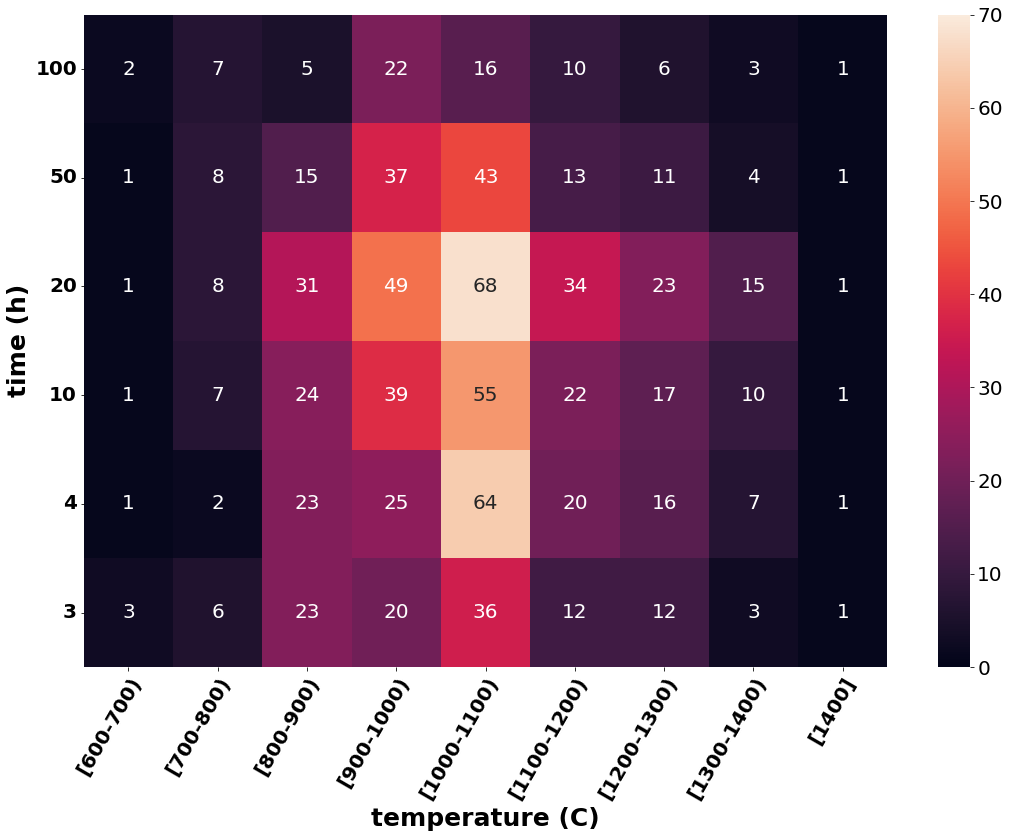

In [5]:
plt.figure(figsize = (18, 12))


ax = sns.heatmap(statistic_list, xticklabels = temperature_bin_name, yticklabels=time_bin,  vmin = 0, vmax = 70, annot = True, annot_kws={"fontsize":20} )
ax.tick_params(axis='both', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 20, ha="right", rotation_mode="anchor", fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 20, fontweight='bold')
ax.set_xlabel("temperature (C)", fontsize = 25, fontweight='bold')
ax.set_ylabel("time (h)", fontsize = 25, fontweight='bold')

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

In [6]:
element_list = ['Al', 'Cr', 'Hf', 'Mo', 'Nb', 'Si', 'Ta', 'Ti', 'V', 'W', 'Zr']

ratio = []

for E in element_list:
    ratio.append(round(len(df[df[E]>0])/len(df)*100,1))

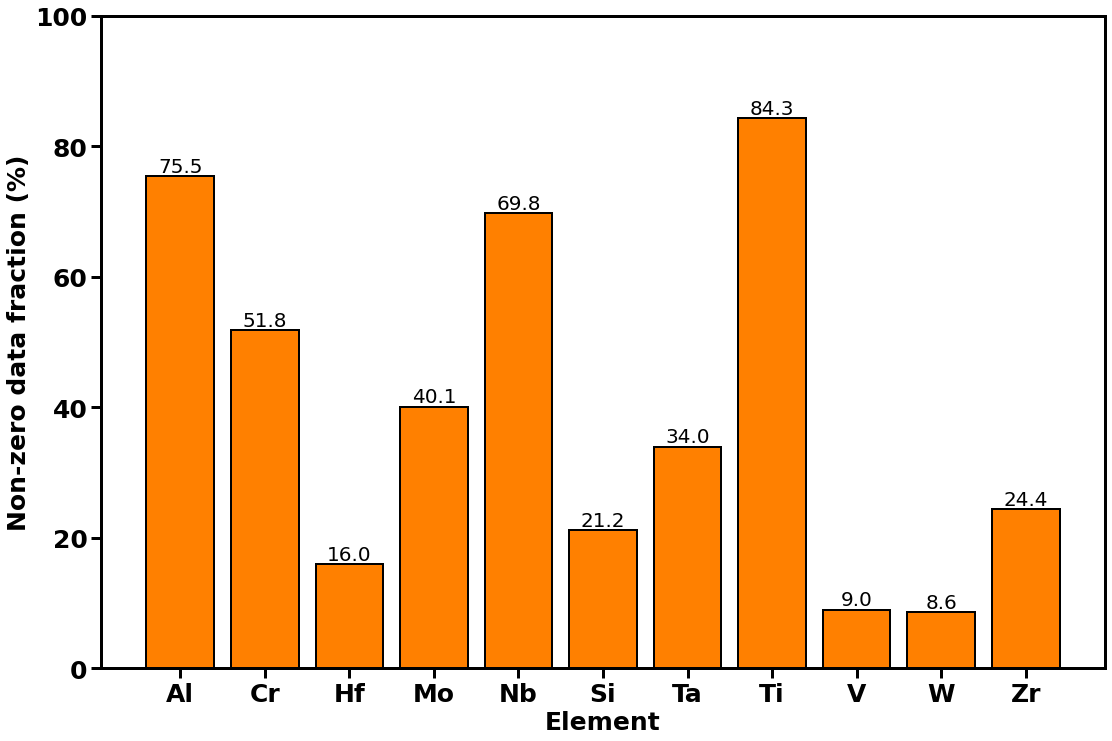

In [7]:
plt.figure(figsize = (18, 12))
hbar = plt.bar(element_list, ratio, width=0.8, linewidth = 10)
plt.xlabel("Element", fontsize = 25, fontweight='bold')
plt.xticks(fontsize = 25, fontweight='bold')
plt.ylim(0,100)
plt.ylabel("Non-zero data fraction (%)", fontsize = 25, fontweight='bold')
plt.yticks(fontsize = 25, fontweight='bold')
plt.bar_label(hbar, labels= ratio, fontsize = 20)

plt.tick_params('both', length= 10, width= 3)
for bar in hbar:
    bar.set_edgecolor("black")
    bar.set_facecolor("#FF8000")
    bar.set_linewidth(2)


ax = plt.gca()

for position in ('top', 'bottom', 'left', 'right'):
    ax.spines[position].set_linewidth(3)

In [8]:
violin_plot = []
for E in element_list:
    violin_plot.append(list(df[df[E]>0][E]))

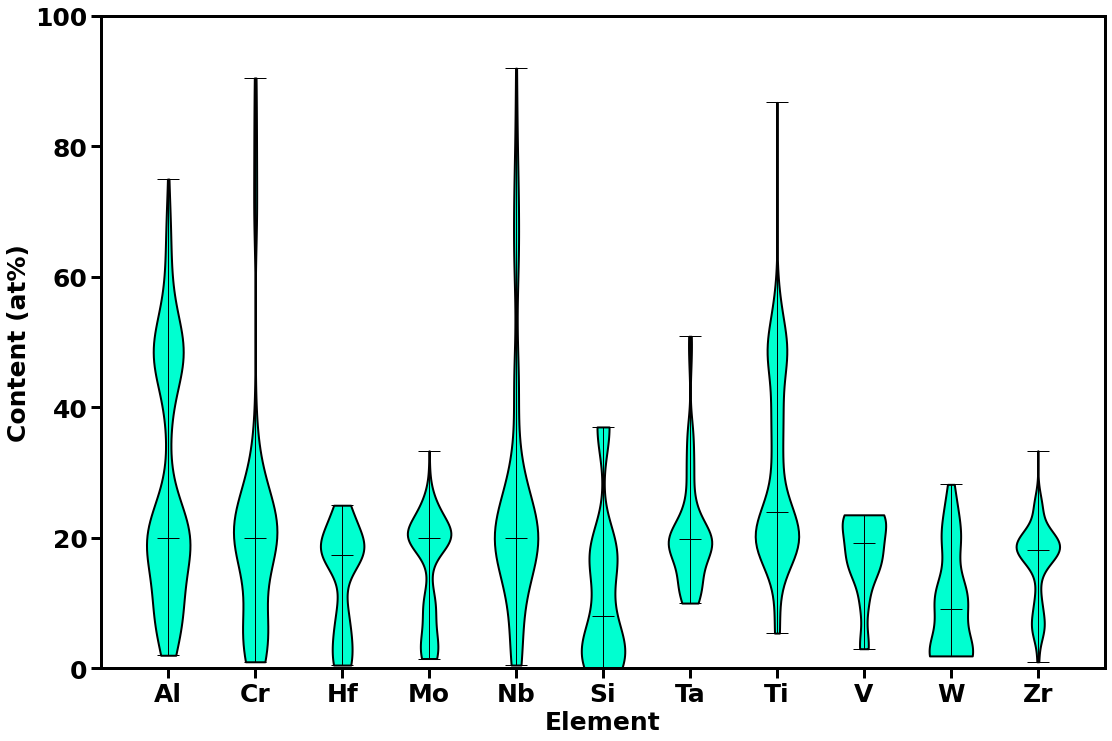

In [9]:
plt.figure(figsize = (18, 12))
tickvalues = range(1,len(element_list)+1)
violin = plt.violinplot(violin_plot, showmeans=False, showmedians=True)
plt.ylim((0,100))
plt.xticks(ticks = tickvalues ,labels = element_list)
plt.xlabel("Element", fontsize = 25, fontweight='bold')
plt.xticks(fontsize = 25, fontweight='bold')
plt.ylabel("Content (at%)", fontsize = 25, fontweight='bold')
plt.yticks(fontsize = 25, fontweight='bold')
plt.tick_params('both', length= 10, width= 3)
for pc in violin['bodies']:
    pc.set_facecolor("#00FFD0")
    pc.set_edgecolor('#000000')
    pc.set_alpha(1)
    pc.set_linewidth(2)

for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = violin[partname]
    vp.set_edgecolor("#000000")
    pc.set_alpha(1)
    vp.set_linewidth(1)

ax = plt.gca()

for position in ('top', 'bottom', 'left', 'right'):
    ax.spines[position].set_linewidth(3)

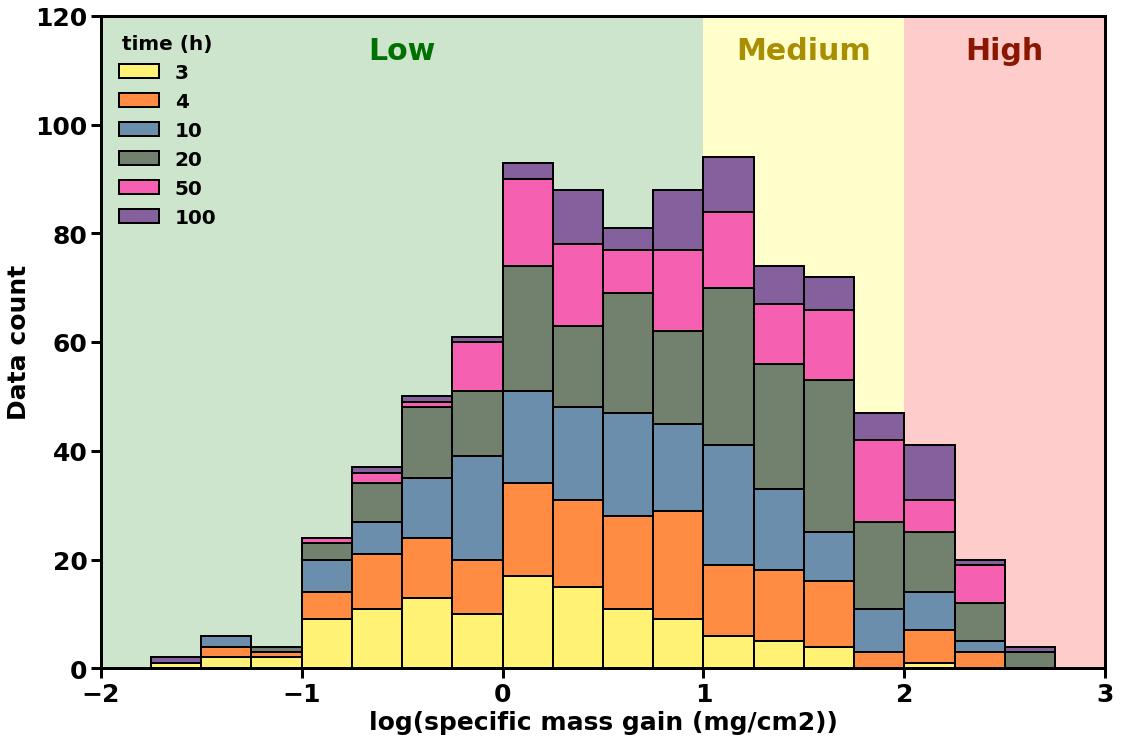

In [11]:

font = font_manager.FontProperties(weight='bold', size=20)
fc = ["#FFF275", "#FF8C42","#6C8EAD", "#71816D", "#F660B0", "#84619D"]

cat_mass_gain = []
time_bin.sort()
for time in time_bin:
    cat_mass_gain.append(np.log10(list(df[df['time (h)'] == time]['specific mass gain (mg/cm2)'])))


plt.figure(figsize = (18, 12))
bins = np.linspace(-2, 3, 21)
hist = plt.hist(cat_mass_gain, bins, fill=True, edgecolor =  '#000000', color = fc, linewidth =  2, stacked=True, label= time_bin)
plt.axvspan(-2, 1, facecolor='green', alpha=0.2, zorder=-100)
plt.text(-.5, 112, "Low", fontsize = 30, fontweight='bold', ha = 'center', color = "#007100")
plt.axvspan(1, 2, facecolor='yellow', alpha=0.2, zorder=-100)
plt.text(1.5, 112, "Medium", fontsize = 30, fontweight='bold', ha = 'center', color = "#A98D02")
plt.axvspan(2, 3, facecolor='red', alpha=0.2, zorder=-100)
plt.text(2.5, 112, "High", fontsize = 30, fontweight='bold', ha = 'center', color = "#8B1700")
plt.xlim(-2,3)
plt.ylim((0,120))
plt.xlabel("log(specific mass gain (mg/cm2))", fontsize = 25, fontweight='bold')
plt.xticks(fontsize = 25, fontweight='bold')
plt.ylabel("Data count", fontsize = 25, fontweight='bold')
plt.yticks(fontsize = 25, fontweight='bold')
plt.tick_params('both', length= 10, width= 3)
plt.legend(fontsize =20, title = 'time (h)', title_fontproperties = font, prop = font,  frameon=False, loc = 'upper left')

ax = plt.gca()

for position in ('top', 'bottom', 'left', 'right'):
    ax.spines[position].set_linewidth(3)


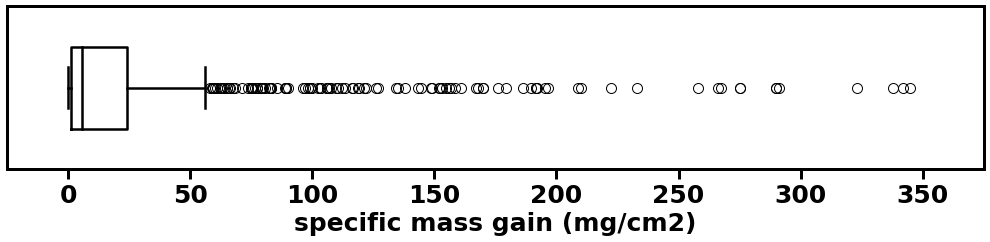

In [12]:
plt.figure(figsize = (17.5, 3))
bx = plt.boxplot(df['specific mass gain (mg/cm2)'], notch = 0, vert = 0, widths = 0.5, whiskerprops=dict(linestyle='-',linewidth=2.0, color='black'),
                 flierprops =dict( marker='o', markerfacecolor="none", markeredgecolor = '#000000', linewidth=20, markersize=10, linestyle='none'))
plt.xlabel("specific mass gain (mg/cm2)", fontsize = 25, fontweight='bold')
plt.xticks(fontsize = 25, fontweight='bold')
plt.tick_params('x', length= 10, width= 3)

plt.setp(bx['boxes'], color='black', linewidth=2.5)
plt.setp(bx['whiskers'], color='black', linewidth=2.5)
plt.setp(bx['fliers'], color='red', marker='o', linewidth=2.5)
plt.setp(bx['caps'], color='black', linewidth=2.5)
plt.setp(bx['medians'], color='black', linewidth=2.5)
plt.xlim([-25, 375])


ax = plt.gca()
ax.tick_params(left = False, labelleft=False) 

for position in ('top', 'bottom', 'left', 'right'):
    ax.spines[position].set_linewidth(3)

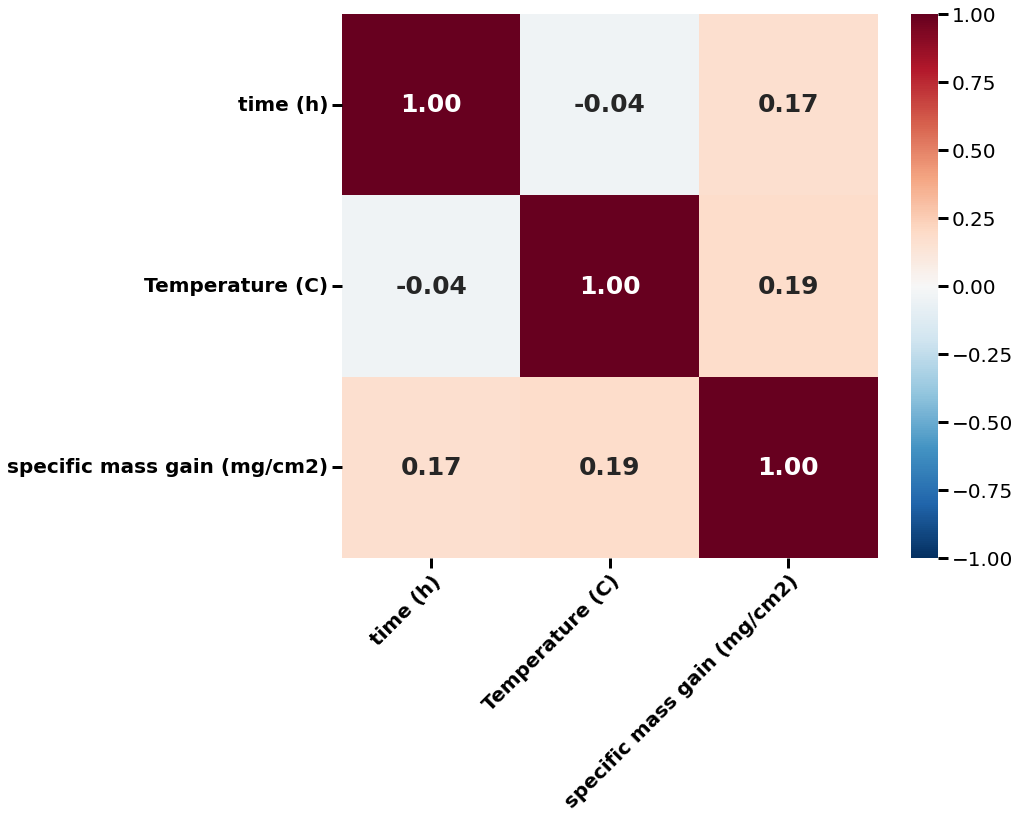

In [13]:
plt.figure(figsize=(12,10))
df2 = df[['time (h)', 'Temperature (C)', 'specific mass gain (mg/cm2)']]
corr = df2.corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, fmt='.2f', center = 0, cmap='RdBu_r', linewidths = 0, linecolor= "black", annot= True, vmin = -1, vmax = 1, annot_kws={"fontsize": 25, "fontweight": "bold"})
plt.xticks(fontsize = 20, fontweight='bold', rotation = 45, ha="right", rotation_mode="anchor")
plt.yticks(fontsize = 20, fontweight='bold', rotation = 0)
plt.tick_params('both', length= 10, width= 3)


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20, length= 10, width= 3)

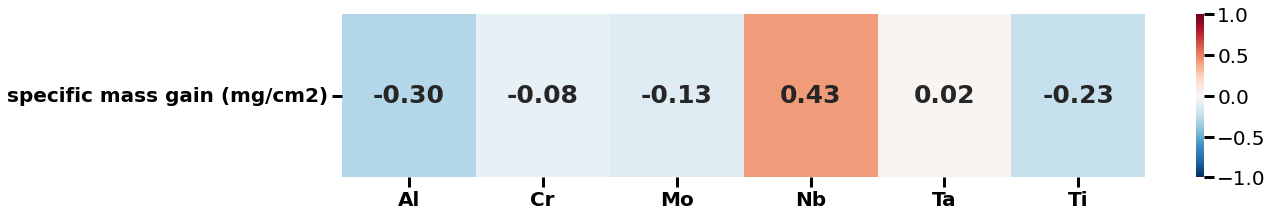

In [14]:
plt.figure(figsize=(18, 3))
df3 = df[['Al', 'Cr', 'Mo', 'Nb', 'Ta', 'Ti', 'specific mass gain (mg/cm2)']]
corr2 = df3.corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr2.iloc[6:7, :6], fmt='.2f', center = 0, cmap='RdBu_r', linewidths = 0, linecolor= "black", annot= True, vmin = -1, vmax = 1, annot_kws={"fontsize": 25, "fontweight": "bold"})
plt.xticks(fontsize = 20, fontweight='bold', rotation = 0)
plt.yticks(fontsize = 20, fontweight='bold', rotation = 0)
plt.tick_params('both', length= 10, width= 3)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20, length= 10, width= 3)

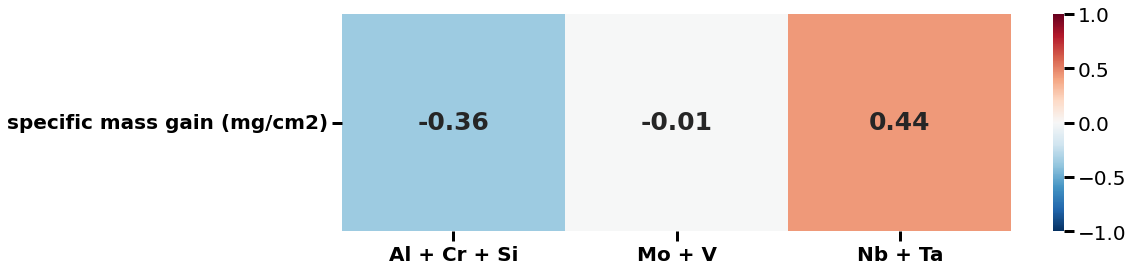

In [15]:
plt.figure(figsize=(15,4))
df4 = df.copy()
df4['Al + Cr + Si'] = df['Al'] + df['Cr'] + df['Si'] 
df4['Mo + V'] = df['Mo'] + df['V'] 
df4['Nb + Ta'] = df['Nb'] + df['Ta'] + df['W'] + df['Zr']
df4 = df4[['Al + Cr + Si', 'Mo + V', 'Nb + Ta', 'specific mass gain (mg/cm2)']]
corr3 = df4.corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr3.iloc[3:4, :3], fmt='.2f', center = 0, cmap='RdBu_r', linewidths = 0, linecolor= "black", annot= True, vmin = -1, vmax = 1, annot_kws={"fontsize": 25, "fontweight": "bold"})
plt.xticks(fontsize = 20, fontweight='bold', rotation = 0)
plt.yticks(fontsize = 20, fontweight='bold', rotation = 0)
plt.tick_params('both', length= 10, width= 3)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20, length= 10, width= 3)

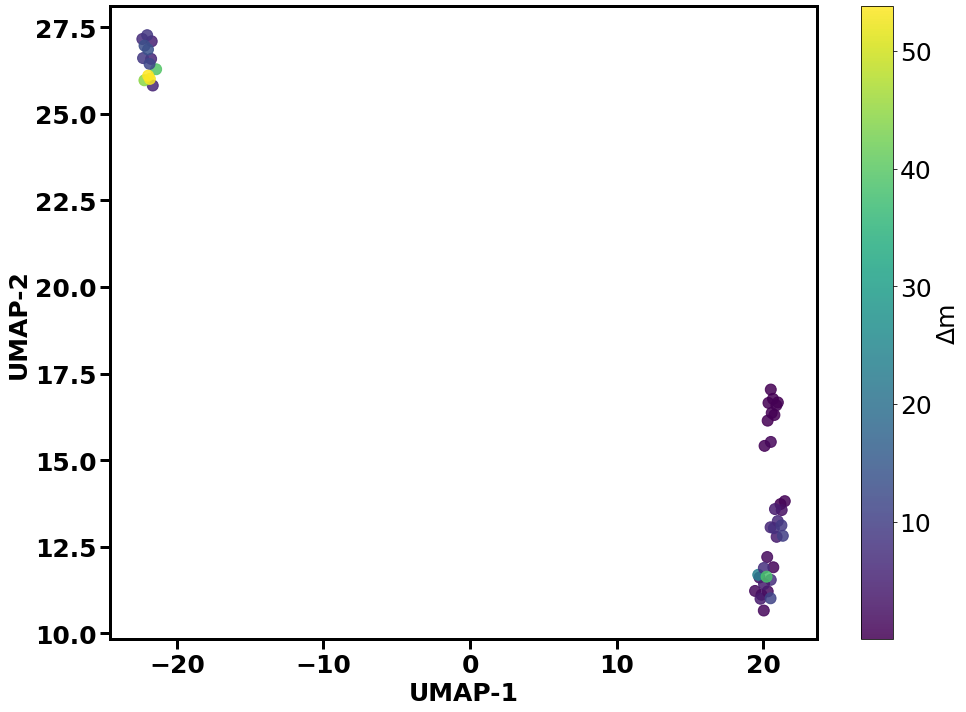

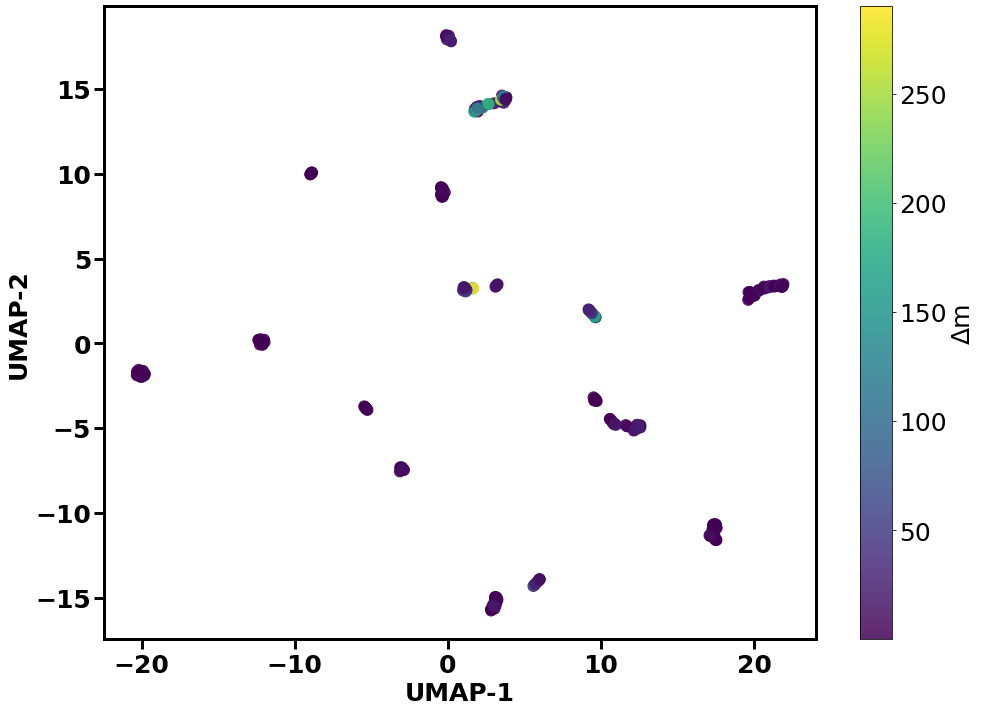

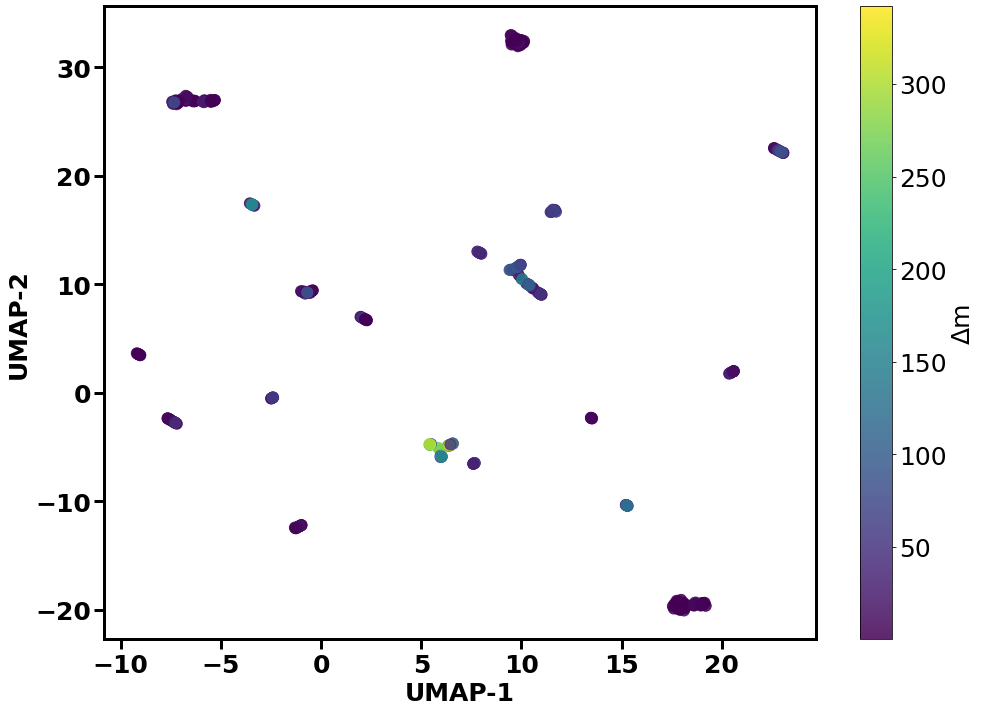

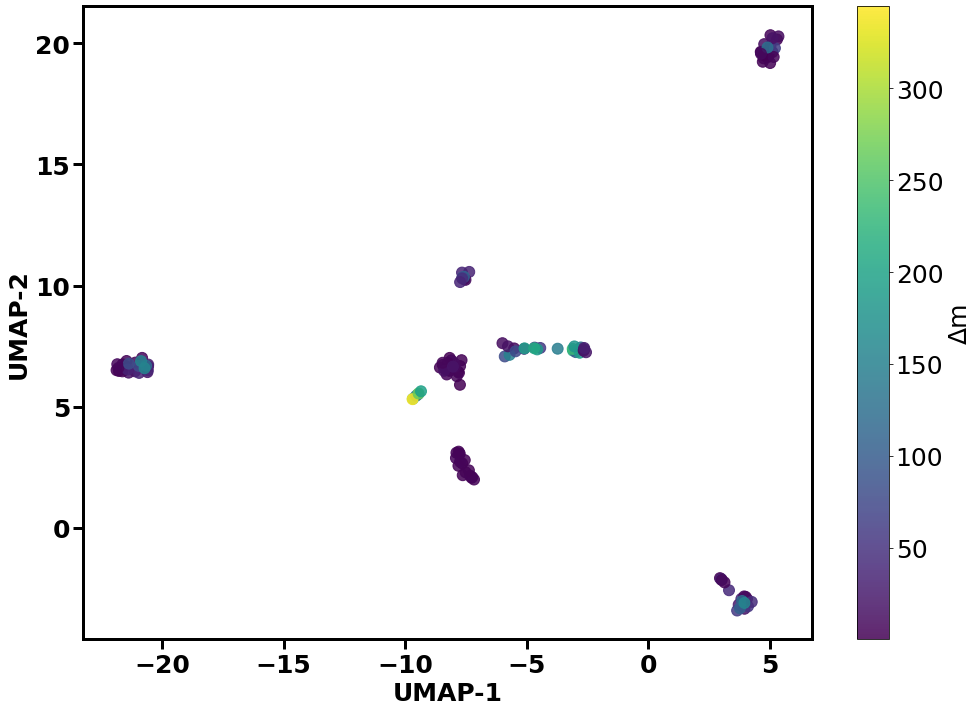

In [54]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import umap  # pip install umap-learn



# -----------------------------
# 2) Extract composition into a matrix (elements as columns)
# -----------------------------
# Option A: composition stored as dict under "composition"

# Option B: element columns already present at top-level
# Define your element list here (edit to match your system!)
element_cols = ["Al", "Cr", "Mo", "Nb", "Ta", "Ti", "V", "Zr", "Hf", "Si", "W"]
comp_df = df.reindex(columns=element_cols).fillna(0.0)

# Keep only numeric columns (just in case JSON normalize created non-numeric)
comp_df = comp_df.apply(pd.to_numeric, errors="coerce").fillna(0.0)

# -----------------------------
# 3) Normalize compositions (row-wise)
#    - This makes each composition sum to 1 (or 100), so UMAP focuses on ratios.
# -----------------------------
X = comp_df.to_numpy(dtype=float)

row_sums = X.sum(axis=1, keepdims=True)
# Avoid divide-by-zero if some rows have all zeros
X_norm = np.divide(X, row_sums, out=np.zeros_like(X), where=row_sums != 0)

# Optional but common: standardize features before UMAP
# (Good when elements have different variances after normalization.)
X_scaled = StandardScaler(with_mean=True, with_std=True).fit_transform(X_norm)

# -----------------------------
# 4) Temperature binning helper
# -----------------------------
def filter_by_temp(df_full, X_full, T_min, T_max, T_col="T"):
    mask = (df_full[T_col] >= T_min) & (df_full[T_col] < T_max)
    return df_full.loc[mask].copy(), X_full[mask.to_numpy()]

# -----------------------------
# 5) Plot UMAP for a given temperature range, colored by Δm
# -----------------------------
def plot_umap_for_temp_range(
    df_full,
    X_full,
    T_min,
    T_max,
    T_col="T",
    dm_col="delta_m",
    n_neighbors=25,
    min_dist=0.10,
    random_state=42
):
    df_T, X_T = filter_by_temp(df_full, X_full, T_min, T_max, T_col=T_col)

    if len(df_T) < 10:
        print(f"[Skip] Not enough points in {T_min}–{T_max} ({len(df_T)} points).")
        return

    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=2,
        metric="euclidean",
        random_state=random_state,
        n_jobs = 1
    )
    emb = reducer.fit_transform(X_T)

    # Δm values
    dm = pd.to_numeric(df_T[dm_col], errors="coerce").to_numpy()

    plt.figure(figsize=(14, 10))
    sc = plt.scatter(
        emb[:, 0], emb[:, 1],
        c=dm,
        s=120,
        alpha=0.85
    )
    
    plt.xlabel("UMAP-1", fontsize = 25, fontweight='bold')
    plt.ylabel("UMAP-2", fontsize = 25, fontweight='bold')
    plt.xticks(fontsize = 25, fontweight='bold')
    plt.yticks(fontsize = 25, fontweight='bold')
    plt.tick_params('both', length= 10, width= 3)
    plt.tight_layout()
    ax = plt.gca()

    for position in ('top', 'bottom', 'left', 'right'):
        ax.spines[position].set_linewidth(3)

    cbar = plt.colorbar(sc)
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label("Δm", size=25)
    plt.show()


# -----------------------------
# 6) Example usage: multiple temperature windows
# -----------------------------
# Make sure these column names match your JSON!
# e.g., if your temperature column is "temperature_C", set T_col accordingly.
T_col = "Temperature (C)"
dm_col = "specific mass gain (mg/cm2)"

# Example bins (edit to match your study)
temp_bins = [
    (600, 800),
    (800, 1000),
    (1000, 1200),
    (1200, 1401)
]

for (T_min, T_max) in temp_bins:
    plot_umap_for_temp_range(
        df_full=df,
        X_full=X_scaled,
        T_min=T_min,
        T_max=T_max,
        T_col=T_col,
        dm_col=dm_col,
        n_neighbors=25,
        min_dist=0.10,
        random_state=42,
        
    )


